#Predicting DD: A Study of Iron and Hemoglobin Concentration

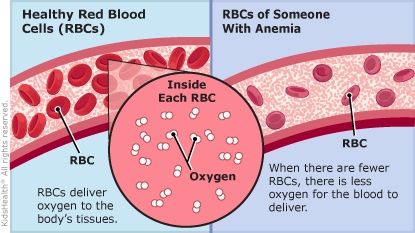

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [313]:
df=pd.read_csv('/content/anemia.csv')
df

,Age,Hb,Hct,MCV,MCHC,RBC,RDW,Fe,UIBC,FERR,DD
0,38,11.70,34.7,84.70,33.79,4.09,14.00,28,376.0,10,True
1,47,8.80,26.8,61.90,32.90,4.33,16.39,13,484.0,5,True
2,36,9.19,26.3,78.40,35.00,3.35,14.00,54,255.0,99,True
3,49,11.80,34.4,74.09,34.20,4.65,13.30,29,408.0,10,True
4,46,9.90,30.1,71.30,32.90,4.23,26.20,259,144.0,10,True
...,...,...,...,...,...,...,...,...,...,...,...
511,70,13.50,38.2,90.00,35.20,4.20,13.90,70,281.0,51,False
512,70,13.90,39.7,84.80,35.10,4.60,15.80,80,156.0,124,False
513,69,12.30,34.9,88.40,34.70,3.80,14.70,63,257.0,63,False
514,67,11.30,34.5,85.00,34.00,3.90,14.00,74,238.0,120,False


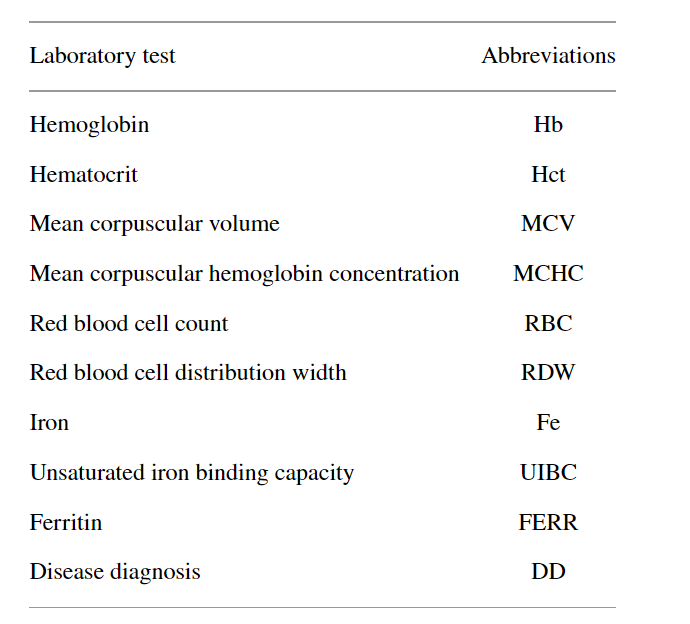

In [314]:
df.dtypes

Age       int64
Hb      float64
Hct     float64
MCV     float64
MCHC    float64
RBC     float64
RDW     float64
Fe        int64
UIBC    float64
FERR      int64
DD         bool
dtype: object

Representation of the data types for each column:

- Age: Integer (int64)
- Hb, Hct, MCV, MCHC, RBC, RDW, UIBC: Floating-Point (float64)
- Fe, FERR: Integer (int64)
- DD: Boolean (bool)

In [315]:
df.isnull().sum()

Age     0
Hb      0
Hct     0
MCV     0
MCHC    0
RBC     0
RDW     0
Fe      0
UIBC    0
FERR    0
DD      0
dtype: int64

There is no null values.

**1. Age and DD**

In [316]:
print(set(df['Age']))

{17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89}


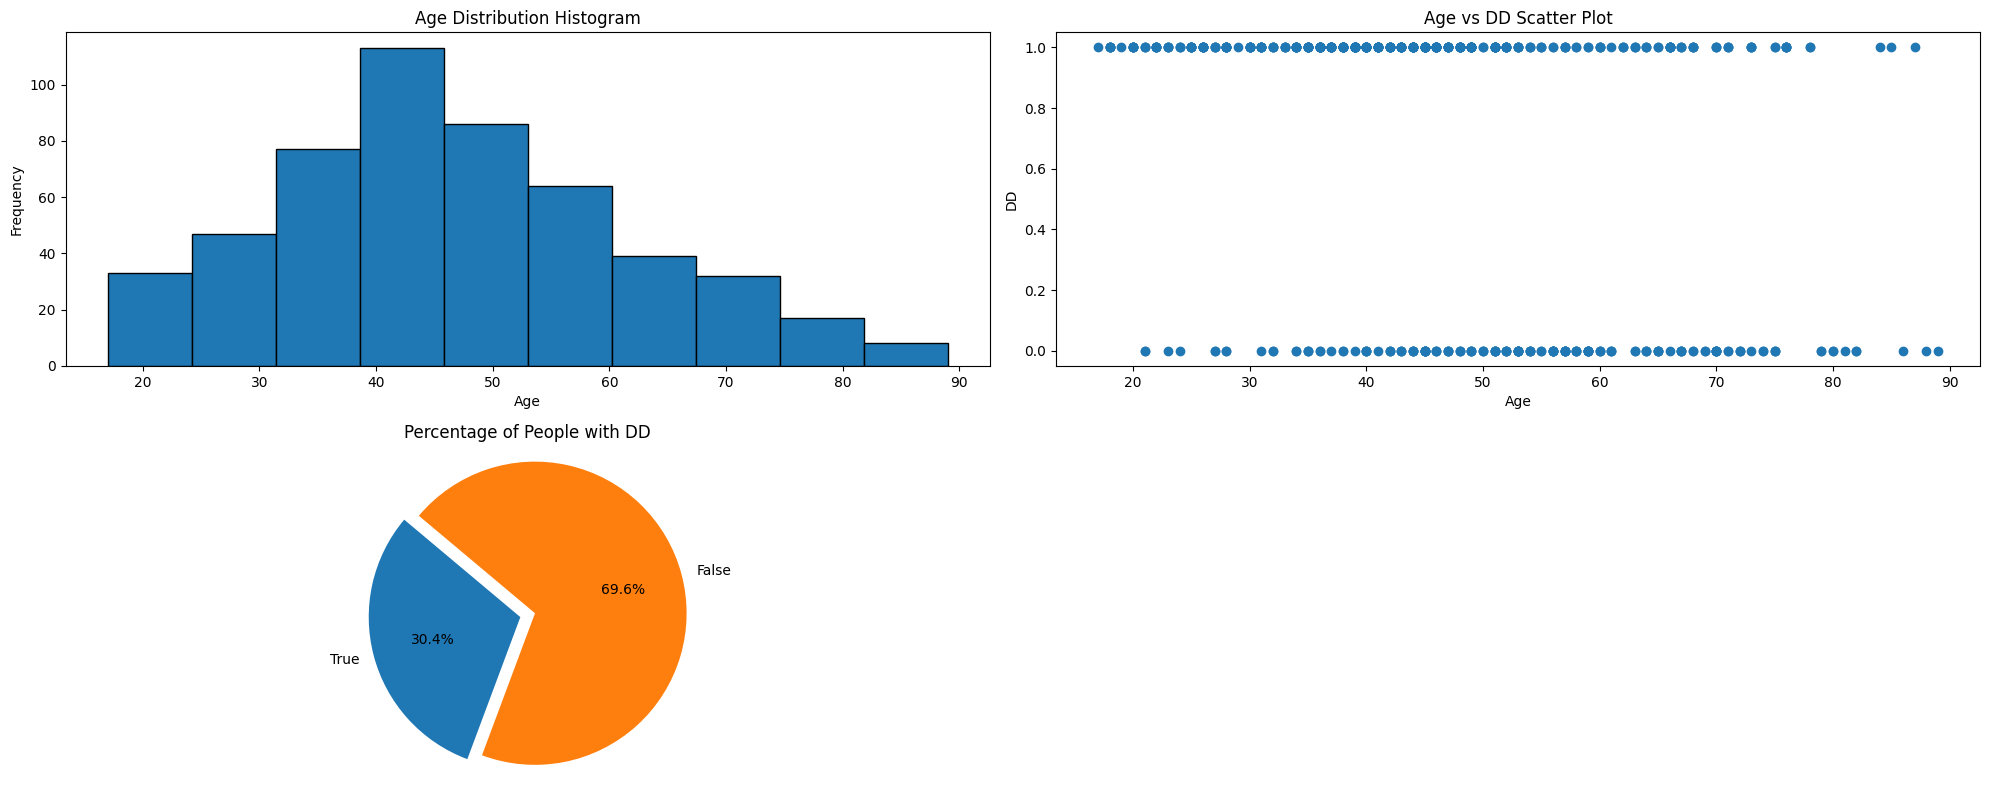

In [317]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
plt.figure(figsize=(20, 8))

# Subplot 1: Age Distribution Histogram
plt.subplot(221)
plt.hist(df['Age'], bins=10, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')

# Subplot 2: Age vs DD Scatter Plot
plt.subplot(222)
plt.scatter(df['Age'], df['DD'])
plt.xlabel('Age')
plt.ylabel('DD')
plt.title('Age vs DD Scatter Plot')

# Subplot 3: Percentage of People with DD (Pie Chart)
plt.subplot(223)

# Assuming df is your DataFrame with a 'DD' column
dd_counts = df['DD'].value_counts()
labels = ['True', 'False']
sizes = [dd_counts[1], dd_counts[0]]
explode = (0.1, 0)  # Explode the 'True' slice

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Percentage of People with DD')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the complete figure with all subplots
plt.show()


Description the visualizations:

1. "Age Distribution Histogram" displays a positively skewed distribution of ages, indicating that the majority of individuals in the dataset are relatively younger.

2. In the "Age vs DD Scatter Plot," horizontal lines are used to distinguish between "True" and "False" values, allowing for a clear separation of data points representing these binary categories.

3. In 'Percentage of People with DD' True is 30.4% and Flase is 69.6%.

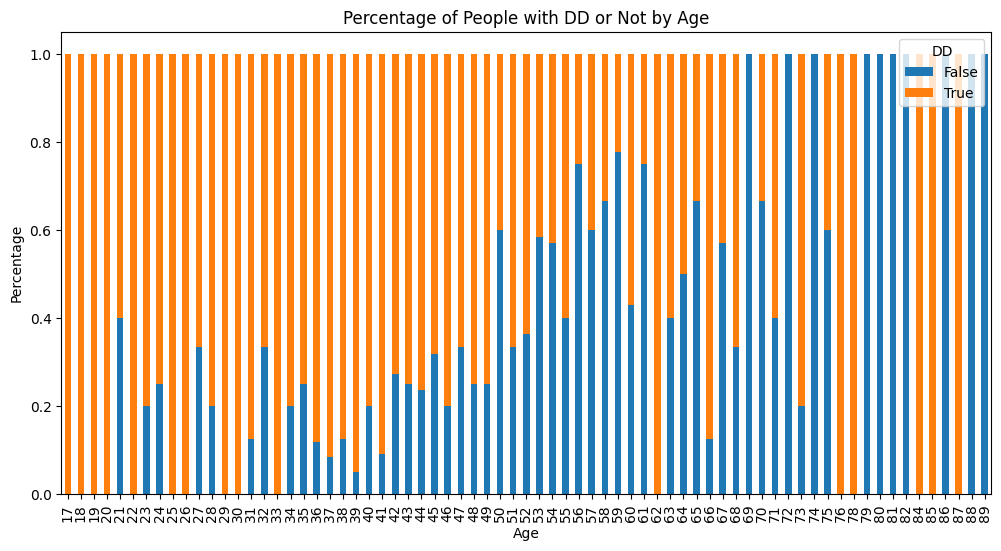

In [318]:
# Calculate the percentage of people with and without 'DD' by age
age_dd_counts = df.groupby('Age')['DD'].value_counts(normalize=True).unstack().fillna(0)

# Create a stacked bar chart
age_dd_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

# Customize the chart labels and title
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Percentage of People with DD or Not by Age')

# Add a legend to label the 'True' and 'Flase' categories
plt.legend(['False', 'True'], title='DD')

# Show the chart
plt.show()


For each age group, the visualization illustrates the percentage of individuals classified as 'True' or 'False' in the dataset, providing insights into the distribution of these binary categories across different age ranges.

In [319]:
age_dd_counts = df.groupby(['Age', 'DD']).size().unstack(fill_value=0)
print(age_dd_counts)


DD   False  True 
Age              
17       0      1
18       0      5
19       0      1
20       0      6
21       2      3
..     ...    ...
85       0      1
86       1      0
87       0      1
88       1      0
89       1      0

[71 rows x 2 columns]


**2. Hb**

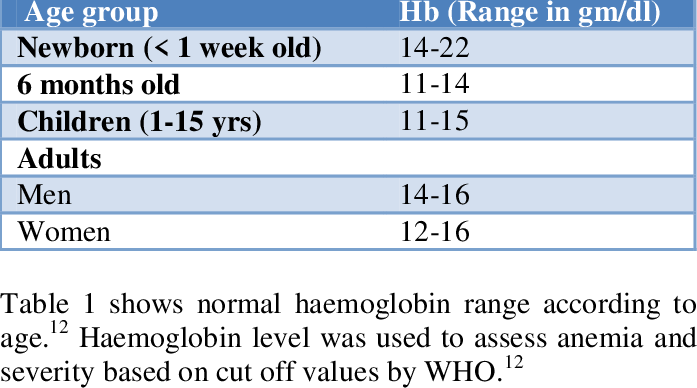

In [320]:
print(f"Total Len   : {len(set(df['Hb']))}")
print(f"Mean value  : {df['Hb'].mean()}")
print(f"Median value: {df['Hb'].median()}")

Total Len   : 103
Mean value  : 11.249437984496122
Median value: 11.25


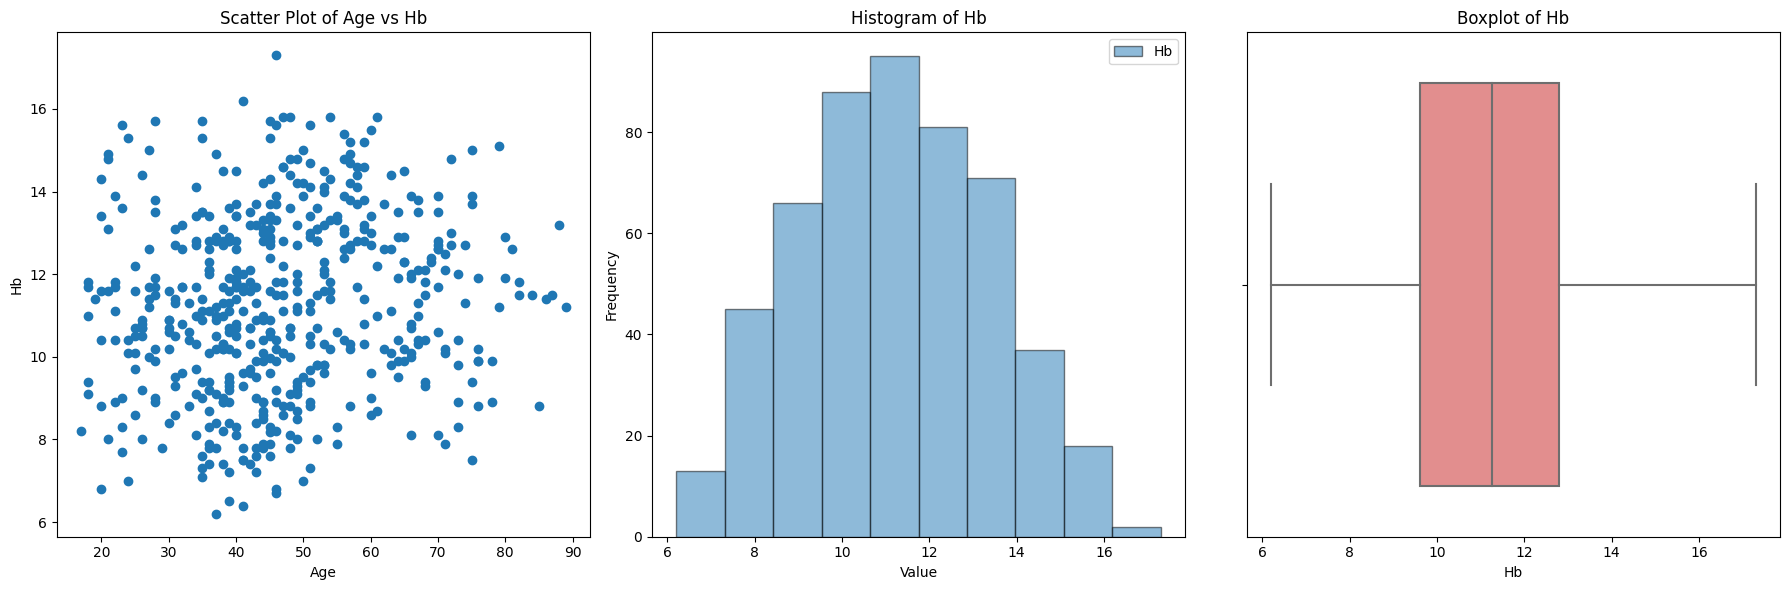

In [321]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Subplot 1: Scatter Plot of Age vs Hb
axs[0].scatter(df['Age'], df['Hb'])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Hb')
axs[0].set_title('Scatter Plot of Age vs Hb')

# Subplot 2: Histogram of Hb
axs[1].hist(df['Hb'], bins=10, alpha=0.5, label='Hb', edgecolor='k')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Hb')
axs[1].legend()

# Subplot 3: Box plot for Hb
sns.boxplot(x='Hb', data=df, ax=axs[2], color='lightcoral')
axs[2].set_title('Boxplot of Hb')
axs[2].set_xlabel('Hb')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the complete figure with all three subplots
plt.show()

Description each of visualizations:

1. "In the Scatter Plot of Age vs Hb, there is no apparent correlation between Age and Hemoglobin (Hb) levels, suggesting that these variables are not strongly related."

2. "The Histogram of Hb reveals a distribution that closely resembles a normal distribution, indicating that Hemoglobin (Hb) levels in the dataset exhibit a typical bell-shaped pattern."

3. "The Boxplot of Hb does not display any outliers, indicating that there are no extreme values in the distribution of Hemoglobin (Hb) levels, and the data is relatively consistent."

In [322]:
# Calculate the IQR (Interquartile Range) for 'Hb'
Q1 = df['Hb'].quantile(0.25)
Q3 = df['Hb'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = df[(df['Hb'] < lower_bound) | (df['Hb'] > upper_bound)]
total_outliers = len(outliers)

print(f"Total number of outliers in 'Hb' column: {total_outliers}")

Total number of outliers in 'Hb' column: 0


**3. Hct**




The normal hematocrit (HCT) range in grams per deciliter (gm/dL) is as follows:

1. Males: 41% to 50% (13.8 to 17.2 gm/dL)

2. Females: 36% to 44% (12.1 to 15.1 gm/dL)

3. Newborn: 45% to 61% (14 to 24 gm/dL)

4. Infants and children: 32% to 42% (9.5 to 13 gm/dL)

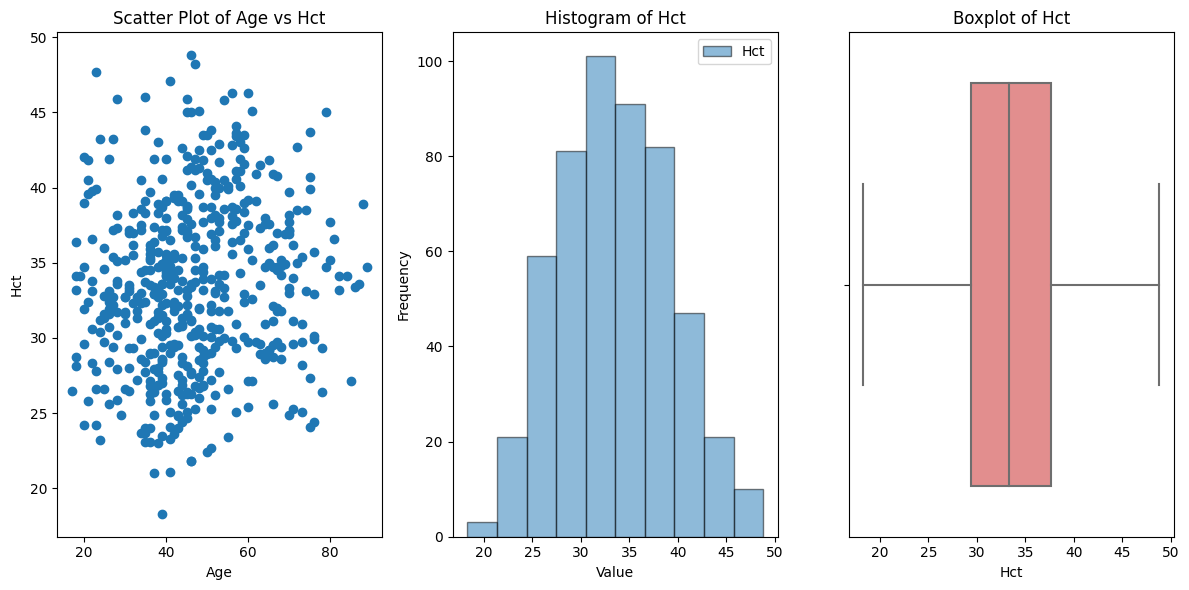

In [323]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Subplot 1: Scatter Plot of Age vs Hct
axs[0].scatter(df['Age'], df['Hct'])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Hct')
axs[0].set_title('Scatter Plot of Age vs Hct')

# Subplot 2: Histogram of Hct
axs[1].hist(df['Hct'], bins=10, alpha=0.5, label='Hct', edgecolor='k')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Hct')
axs[1].legend()

# Subplot 3: Box plot for Hct
sns.boxplot(x='Hct', data=df, ax=axs[2], color='lightcoral')
axs[2].set_title('Boxplot of Hct')
axs[2].set_xlabel('Hct')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the complete figure with both subplots
plt.show()

Description each of visualizations:

1. "In the Scatter Plot of Age vs Hct, there is no apparent correlation between Age and Hematocrit (Hct) levels, suggesting that these variables are not strongly related."

2. "The Histogram of Hct reveals a distribution that closely resembles a normal distribution, indicating that Hematocrit (Hct) levels in the dataset exhibit a typical bell-shaped pattern."

3. "The Boxplot of Hematocrit (Hct) does not display any outliers, indicating that there are no extreme values in the distribution of Hematocrit (Hct) levels, and the data is relatively consistent."

In [324]:
# Calculate the IQR (Interquartile Range) for 'Hct'
Q1 = df['Hct'].quantile(0.25)
Q3 = df['Hct'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = df[(df['Hct'] < lower_bound) | (df['Hct'] > upper_bound)]
total_outliers = len(outliers)

print(f"Total number of outliers in 'Hct' column: {total_outliers}")

Total number of outliers in 'Hct' column: 0


**4. MCV**



The normal mean corpuscular volume (MCV) range in femtoliters (fL) is as follows:

1. Adults: 80 to 100 fL
2. Newborns: 96 to 108 fL

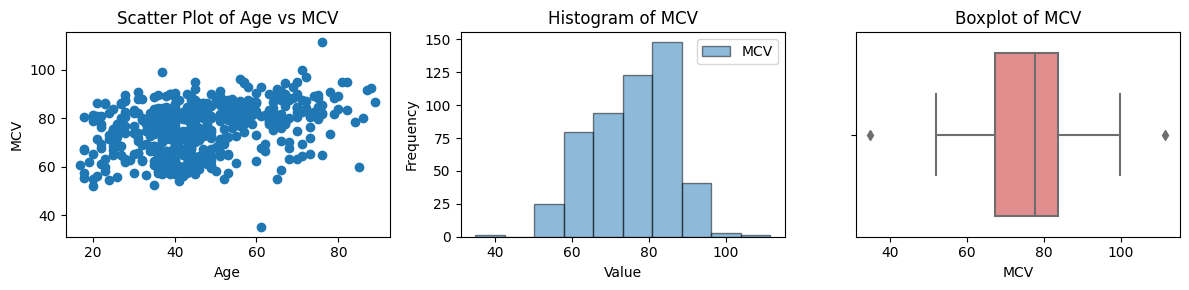

In [325]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

# Subplot 1: Scatter Plot of Age vs MCV
axs[0].scatter(df['Age'], df['MCV'])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('MCV')
axs[0].set_title('Scatter Plot of Age vs MCV')

# Subplot 2: Histogram of MCV
axs[1].hist(df['MCV'], bins=10, alpha=0.5, label='MCV', edgecolor='k')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of MCV')
axs[1].legend()

# Subplot 3: Box plot for MCV
sns.boxplot(x='MCV', data=df, ax=axs[2], color='lightcoral')
axs[2].set_title('Boxplot of MCV')
axs[2].set_xlabel('MCV')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the complete figure with both subplots
plt.show()

Description each of the visualizations:

1. "In the Scatter Plot of Age vs MCV, a noticeable positive correlation is evident, suggesting that as age increases, Mean Corpuscular Volume (MCV) tends to rise."

2. "The Histogram of MCV exhibits a negatively skewed distribution, indicating that the majority of MCV values are concentrated on the higher end, with a tail extending towards the lower values."

3. "The Boxplot of MCV highlights the presence of two outliers, signifying that there are unusual data points that fall significantly outside the typical range of MCV values in the dataset."

In [326]:
# Calculate the IQR (Interquartile Range) for 'MCV'
Q1 = df['MCV'].quantile(0.25)
Q3 = df['MCV'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = df[(df['MCV'] < lower_bound) | (df['MCV'] > upper_bound)]
total_outliers = len(outliers)

print(f"Total number of outliers in 'MCV' column: {total_outliers}")

Total number of outliers in 'MCV' column: 2


In [327]:
# Calculate quartiles
Q1 = df['MCV'].quantile(0.25)
Q3 = df['MCV'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df= df[(df['MCV'] >= lower_bound) & (df['MCV'] <= upper_bound)]

# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(len(df))

DataFrame without outliers:
514


After the removal of outliers, the dataset now consists of 514 columns.

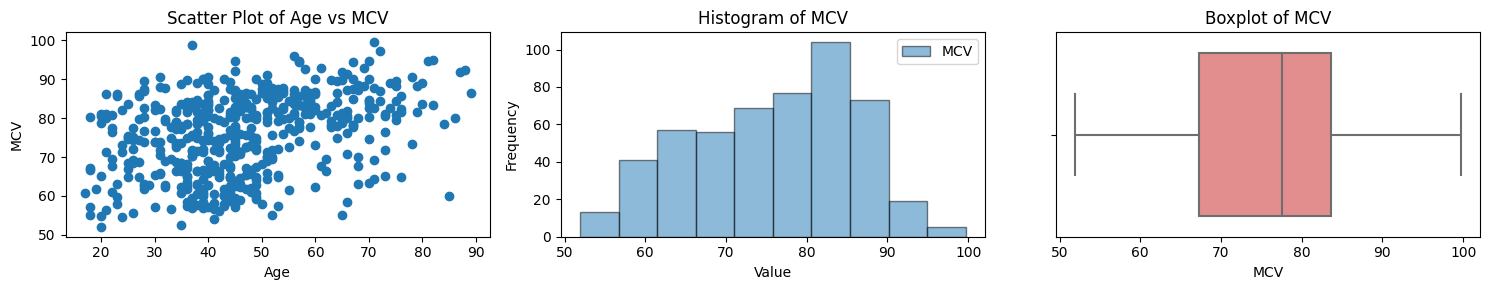

In [328]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 3))

# Subplot 1: Scatter Plot of Age vs MCV
axs[0].scatter(df['Age'], df['MCV'])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('MCV')
axs[0].set_title('Scatter Plot of Age vs MCV')

# Subplot 2: Histogram of MCV
axs[1].hist(df['MCV'], bins=10, alpha=0.5, label='MCV', edgecolor='k')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of MCV')
axs[1].legend()

# Subplot 3: Box plot for MCV
sns.boxplot(x='MCV', data=df, ax=axs[2], color='lightcoral')
axs[2].set_title('Boxplot of MCV')
axs[2].set_xlabel('MCV')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the complete figure with both subplots
plt.show()

In [329]:
# Calculate the IQR (Interquartile Range) for 'MCV'
Q1 = df['MCV'].quantile(0.25)
Q3 = df['MCV'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = df[(df['MCV'] < lower_bound) | (df['MCV'] > upper_bound)]
total_outliers = len(outliers)

print(f"Total number of outliers in 'MCV' column: {total_outliers}")

Total number of outliers in 'MCV' column: 0


**5. MCHC**


Adults: 32 to 36 g/dL (320 to 360 g/L)

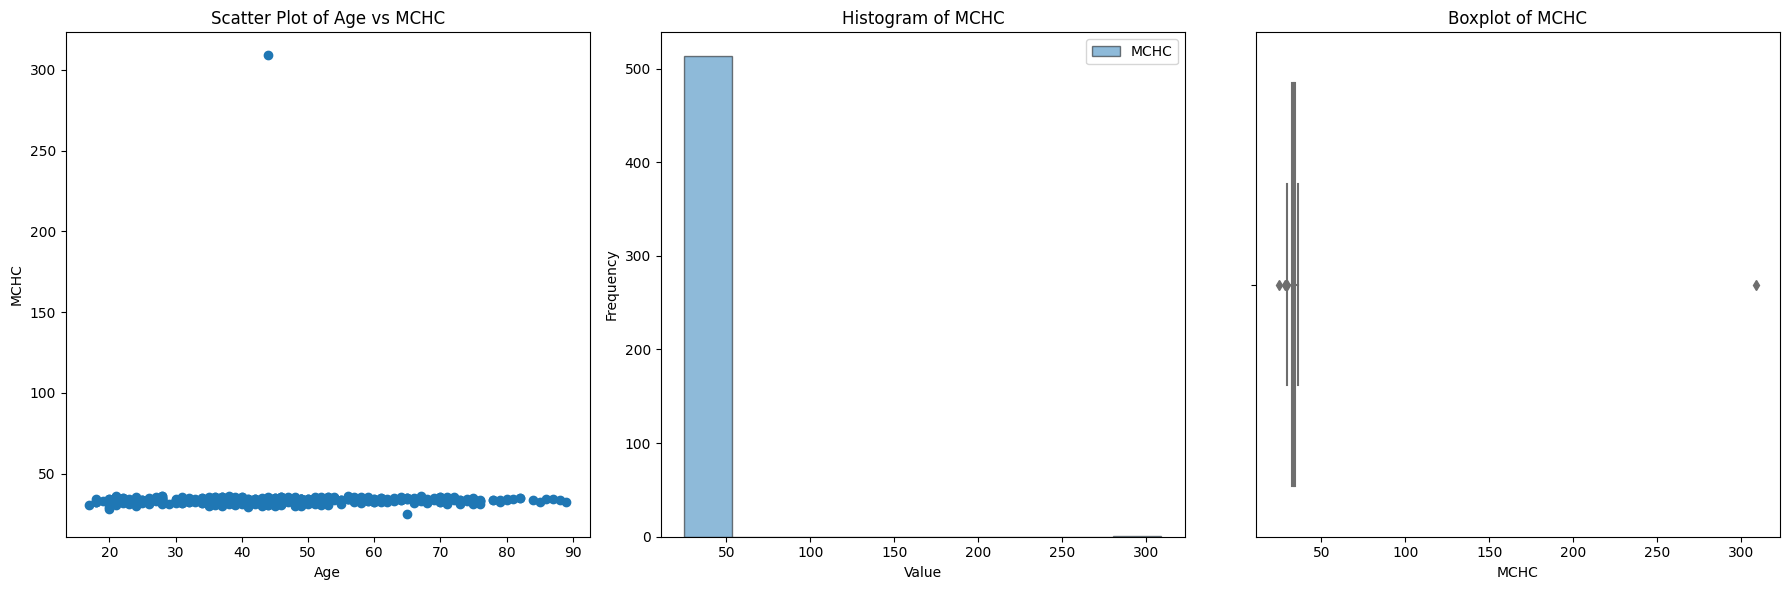

In [330]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Subplot 1: Scatter Plot of Age vs MCHC
axs[0].scatter(df['Age'], df['MCHC'])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('MCHC')
axs[0].set_title('Scatter Plot of Age vs MCHC')

# Subplot 2: Histogram of MCHC
axs[1].hist(df['MCHC'], bins=10, alpha=0.5, label='MCHC', edgecolor='k')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of MCHC')
axs[1].legend()

# Subplot 3: Box plot for MCHC
sns.boxplot(x='MCHC', data=df, ax=axs[2], color='lightcoral')
axs[2].set_title('Boxplot of MCHC')
axs[2].set_xlabel('MCHC')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the complete figure with all three subplots
plt.show()

Description of the visualizations:

1. "The Scatter Plot of Age vs MCHC shows a nearly horizontal pattern, suggesting that there is little to no discernible correlation between Age and Mean Corpuscular Hemoglobin Concentration (MCHC)."

2. "In the Boxplot of MCHC, five outliers are observed, indicating the presence of values that fall significantly outside the typical range of MCHC in the dataset."

In [331]:
# Calculate the IQR (Interquartile Range) for 'MCHC'
Q1 = df['MCHC'].quantile(0.25)
Q3 = df['MCHC'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = df[(df['MCHC'] < lower_bound) | (df['MCHC'] > upper_bound)]
total_outliers = len(outliers)

print(f"Total number of outliers in 'MCHC' column: {total_outliers}")

Total number of outliers in 'MCHC' column: 5


In [332]:
# Calculate quartiles
Q1 = df['MCHC'].quantile(0.25)
Q3 = df['MCHC'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df= df[(df['MCHC'] >= lower_bound) & (df['MCHC'] <= upper_bound)]

# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(len(df))

DataFrame without outliers:
509


After the removal of outliers, the dataset now consists of 509 columns.

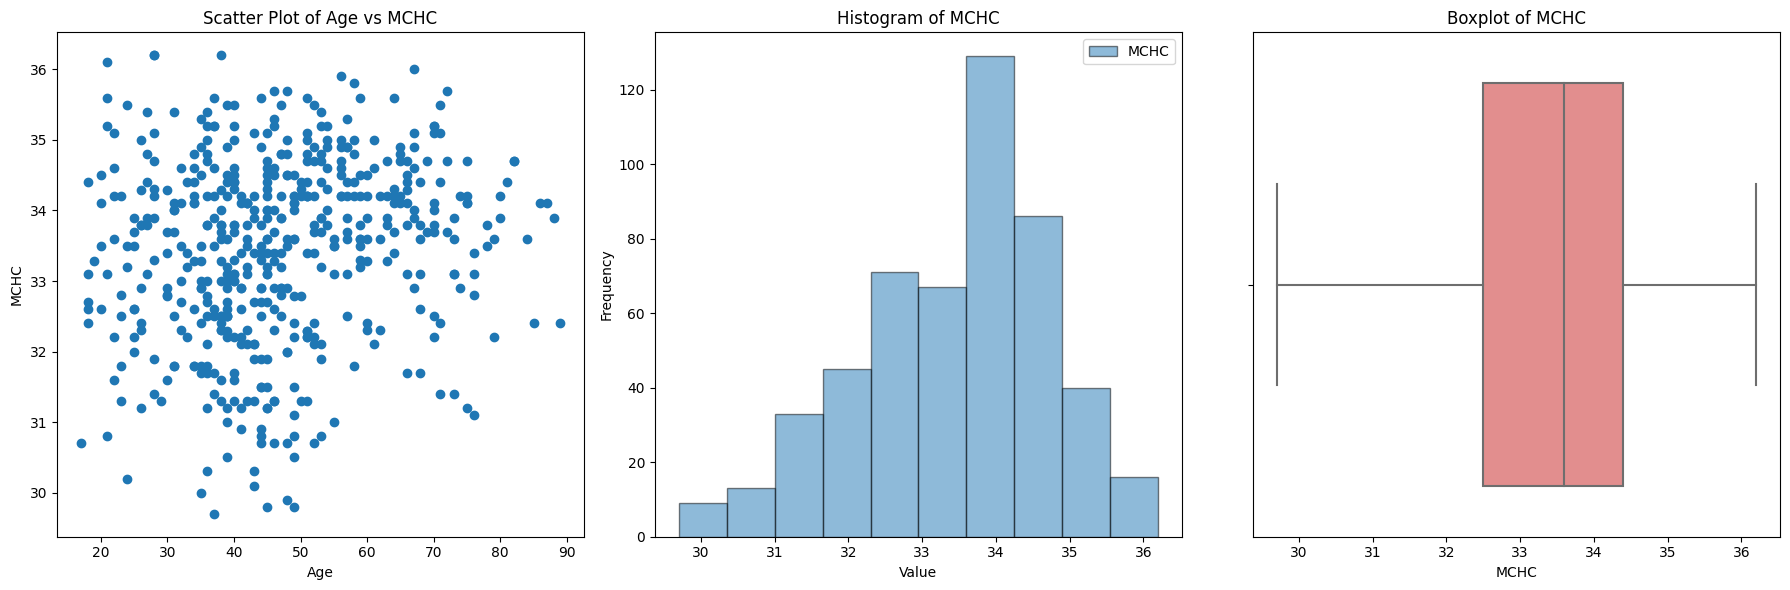

In [333]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Subplot 1: Scatter Plot of Age vs MCHC
axs[0].scatter(df['Age'], df['MCHC'])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('MCHC')
axs[0].set_title('Scatter Plot of Age vs MCHC')

# Subplot 2: Histogram of MCHC
axs[1].hist(df['MCHC'], bins=10, alpha=0.5, label='MCHC', edgecolor='k')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of MCHC')
axs[1].legend()

# Subplot 3: Box plot for MCHC
sns.boxplot(x='MCHC', data=df, ax=axs[2], color='lightcoral')
axs[2].set_title('Boxplot of MCHC')
axs[2].set_xlabel('MCHC')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the complete figure with all three subplots
plt.show()

In [334]:
# Calculate the IQR (Interquartile Range) for 'MCHC'
Q1 = df['MCHC'].quantile(0.25)
Q3 = df['MCHC'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = df[(df['MCHC'] < lower_bound) | (df['MCHC'] > upper_bound)]
total_outliers = len(outliers)

print(f"Total number of outliers in 'MCHC' column: {total_outliers}")

Total number of outliers in 'MCHC' column: 0


Now there is no outliers.

**6. RBC**


The normal red blood cell (RBC) range in millions of cells per microliter (mcL) is as follows:

1. Males: 4.7 to 6.1 million cells/mcL
2. Females: 4.2 to 5.4 million cells/mcL

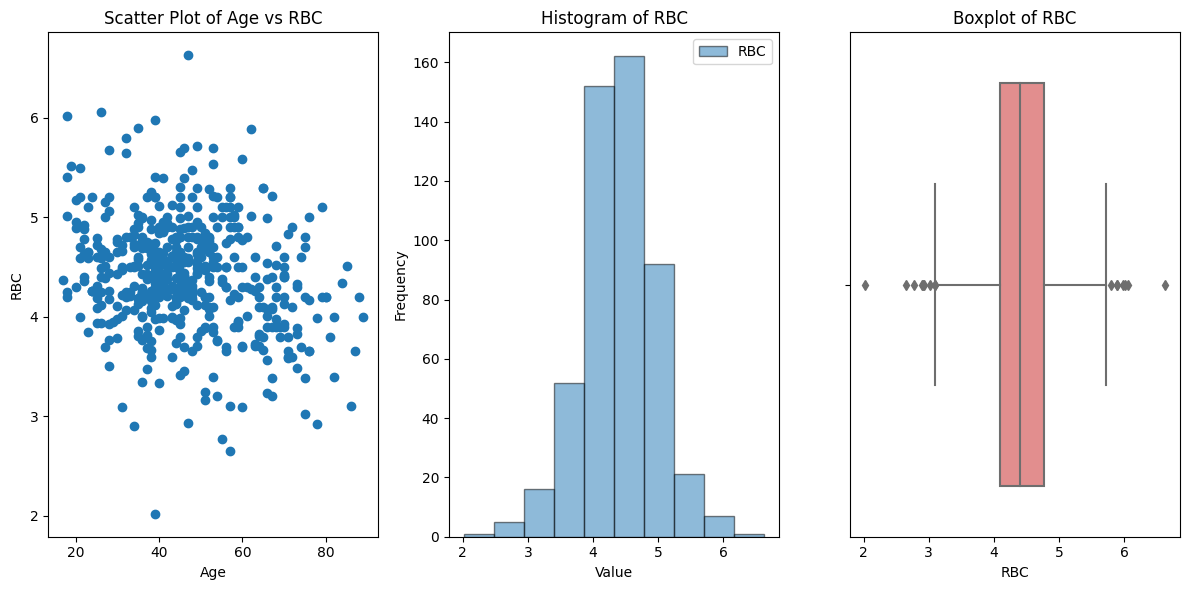

In [335]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Subplot 1: Scatter Plot of Age vs RBC
axs[0].scatter(df['Age'], df['RBC'])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('RBC')
axs[0].set_title('Scatter Plot of Age vs RBC')

# Subplot 2: Histogram of RBC
axs[1].hist(df['RBC'], bins=10, alpha=0.5, label='RBC', edgecolor='k')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of RBC')
axs[1].legend()

# Subplot 3: Box plot for RBC
sns.boxplot(x='RBC', data=df, ax=axs[2], color='lightcoral')
axs[2].set_title('Boxplot of RBC')
axs[2].set_xlabel('RBC')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the complete figure with both subplots
plt.show()

Description each of the visualizations:

1. The Scatter Plot of Age vs RBC reveals an absence of any noticeable correlation, suggesting that there is no significant relationship between Age and Red Blood Cell count (RBC).

2. The Histogram of RBC displays a distribution that closely approximates a normal distribution, indicating that the data for Red Blood Cell count (RBC) is distributed in a typical bell-shaped pattern.

3. The Boxplot of RBC identifies the presence of 16 outliers, signifying the existence of data points that fall well outside the typical range of RBC values in the dataset.

In [336]:
# Calculate the IQR (Interquartile Range) for 'RBC'
Q1 = df['RBC'].quantile(0.25)
Q3 = df['RBC'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = df[(df['RBC'] < lower_bound) | (df['RBC'] > upper_bound)]
total_outliers = len(outliers)

print(f"Total number of outliers in 'RBC' column: {total_outliers}")

Total number of outliers in 'RBC' column: 16


In [337]:
# Calculate quartiles
Q1 = df['RBC'].quantile(0.25)
Q3 = df['RBC'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df= df[(df['RBC'] >= lower_bound) & (df['RBC'] <= upper_bound)]

# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(len(df))

DataFrame without outliers:
493


After the removal of outliers, the dataset now consists of 493 columns.

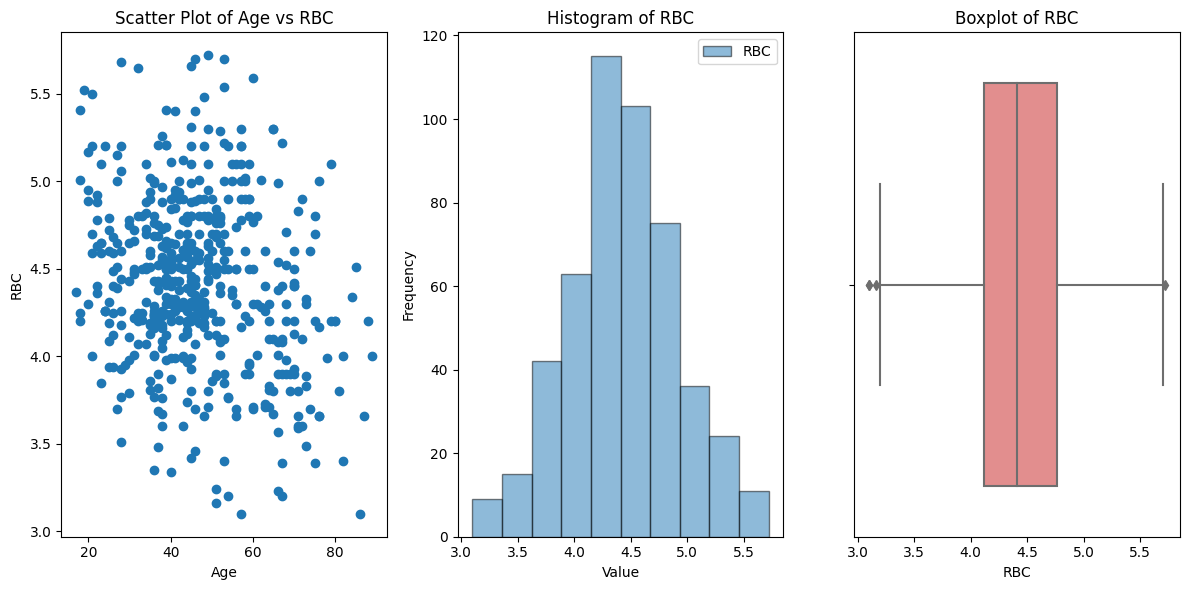

In [338]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Subplot 1: Scatter Plot of Age vs RBC
axs[0].scatter(df['Age'], df['RBC'])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('RBC')
axs[0].set_title('Scatter Plot of Age vs RBC')

# Subplot 2: Histogram of RBC
axs[1].hist(df['RBC'], bins=10, alpha=0.5, label='RBC', edgecolor='k')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of RBC')
axs[1].legend()

# Subplot 3: Box plot for RBC
sns.boxplot(x='RBC', data=df, ax=axs[2], color='lightcoral')
axs[2].set_title('Boxplot of RBC')
axs[2].set_xlabel('RBC')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the complete figure with both subplots
plt.show()

In [339]:
# Calculate the IQR (Interquartile Range) for 'RBC'
Q1 = df['RBC'].quantile(0.25)
Q3 = df['RBC'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = df[(df['RBC'] < lower_bound) | (df['RBC'] > upper_bound)]
total_outliers = len(outliers)

print(f"Total number of outliers in 'RBC' column: {total_outliers}")

Total number of outliers in 'RBC' column: 4


After removing the outliers, the dataset now contains 4 remaining outliers.

**7. RDW**



The normal red cell distribution width (RDW) range in adults is as follows:

1. RDW-CV: 11.6% to 14.6%
2. RDW-SD: 39.0 to 46.0 fL

The normal RDW range in adults is slightly different for males and females.
1. Males: 11.8% to 14.5%
2. Females: 12.2% to 16.1%

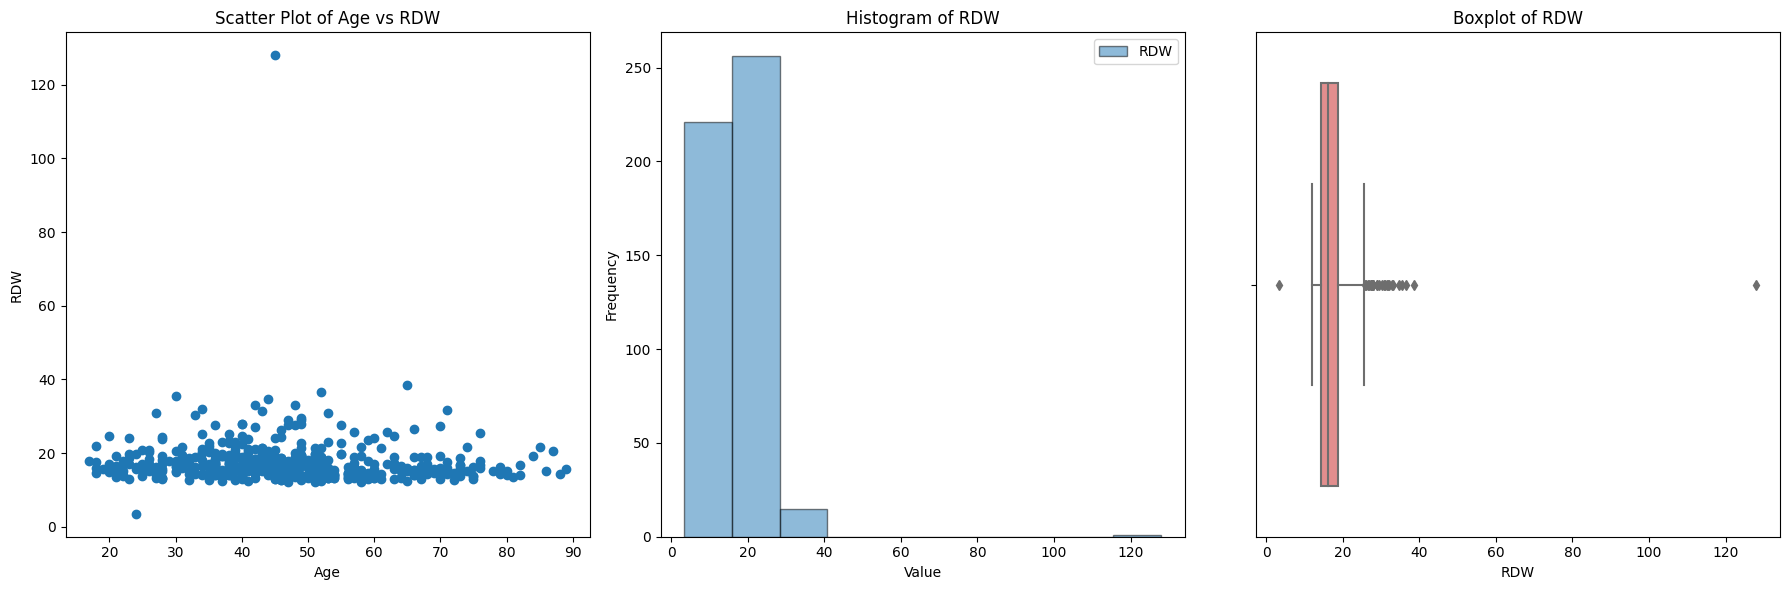

In [340]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Subplot 1: Scatter Plot of Age vs RDW
axs[0].scatter(df['Age'], df['RDW'])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('RDW')
axs[0].set_title('Scatter Plot of Age vs RDW')

# Subplot 2: Histogram of RDW
axs[1].hist(df['RDW'], bins=10, alpha=0.5, label='RDW', edgecolor='k')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of RDW')
axs[1].legend()

# Subplot 3: Box plot for RDW
sns.boxplot(x='RDW', data=df, ax=axs[2], color='lightcoral')
axs[2].set_title('Boxplot of RDW')
axs[2].set_xlabel('RDW')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the complete figure with all three subplots
plt.show()

Description of the visualizations:

1. The 'Scatter Plot of Age vs RDW' shows a nearly horizontal pattern, suggesting that there is little to no discernible correlation between Age and RDW.

2. In the 'Boxplot of RDW', 29 outliers are observed, indicating the presence of values that fall significantly outside the typical range of RDW in the dataset.

In [341]:
# Calculate the IQR (Interquartile Range) for 'RDW'
Q1 = df['RDW'].quantile(0.25)
Q3 = df['RDW'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = df[(df['RDW'] < lower_bound) | (df['RDW'] > upper_bound)]
total_outliers = len(outliers)

print(f"Total number of outliers in 'RDW' column: {total_outliers}")

Total number of outliers in 'RDW' column: 29


In [342]:
# Calculate quartiles
Q1 = df['RDW'].quantile(0.25)
Q3 = df['RDW'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df= df[(df['RDW'] >= lower_bound) & (df['RDW'] <= upper_bound)]

# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(len(df))

DataFrame without outliers:
464


After the removal of outliers, the dataset now consists of 464 columns.

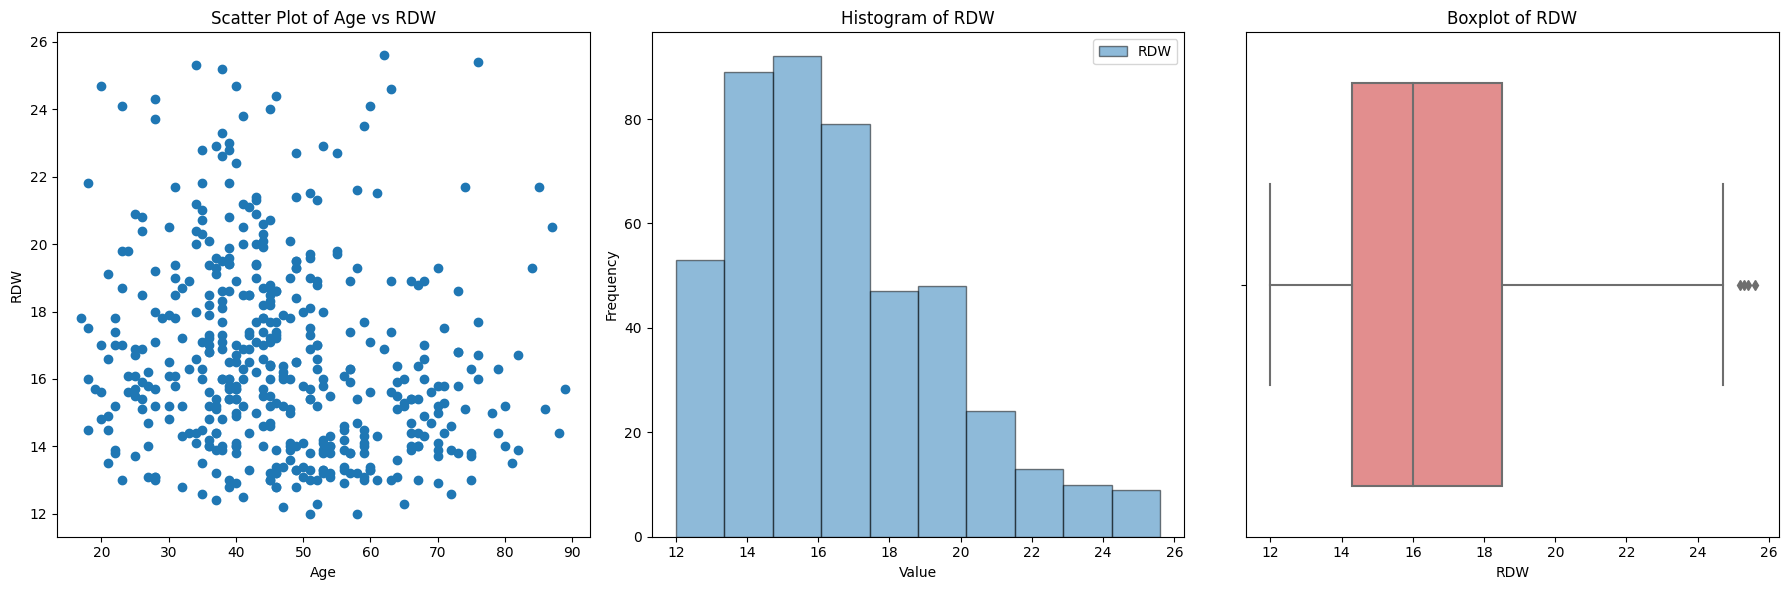

In [343]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Subplot 1: Scatter Plot of Age vs RDW
axs[0].scatter(df['Age'], df['RDW'])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('RDW')
axs[0].set_title('Scatter Plot of Age vs RDW')

# Subplot 2: Histogram of RDW
axs[1].hist(df['RDW'], bins=10, alpha=0.5, label='RDW', edgecolor='k')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of RDW')
axs[1].legend()

# Subplot 3: Box plot for RDW
sns.boxplot(x='RDW', data=df, ax=axs[2], color='lightcoral')
axs[2].set_title('Boxplot of RDW')
axs[2].set_xlabel('RDW')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the complete figure with all three subplots
plt.show()

In [344]:
# Calculate the IQR (Interquartile Range) for 'RDW'
Q1 = df['RDW'].quantile(0.25)
Q3 = df['RDW'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = df[(df['RDW'] < lower_bound) | (df['RDW'] > upper_bound)]
total_outliers = len(outliers)

print(f"Total number of outliers in 'RDW' column: {total_outliers}")

Total number of outliers in 'RDW' column: 4


After removing the outliers, the dataset now contains 4 remaining outliers.

**8. Fe**


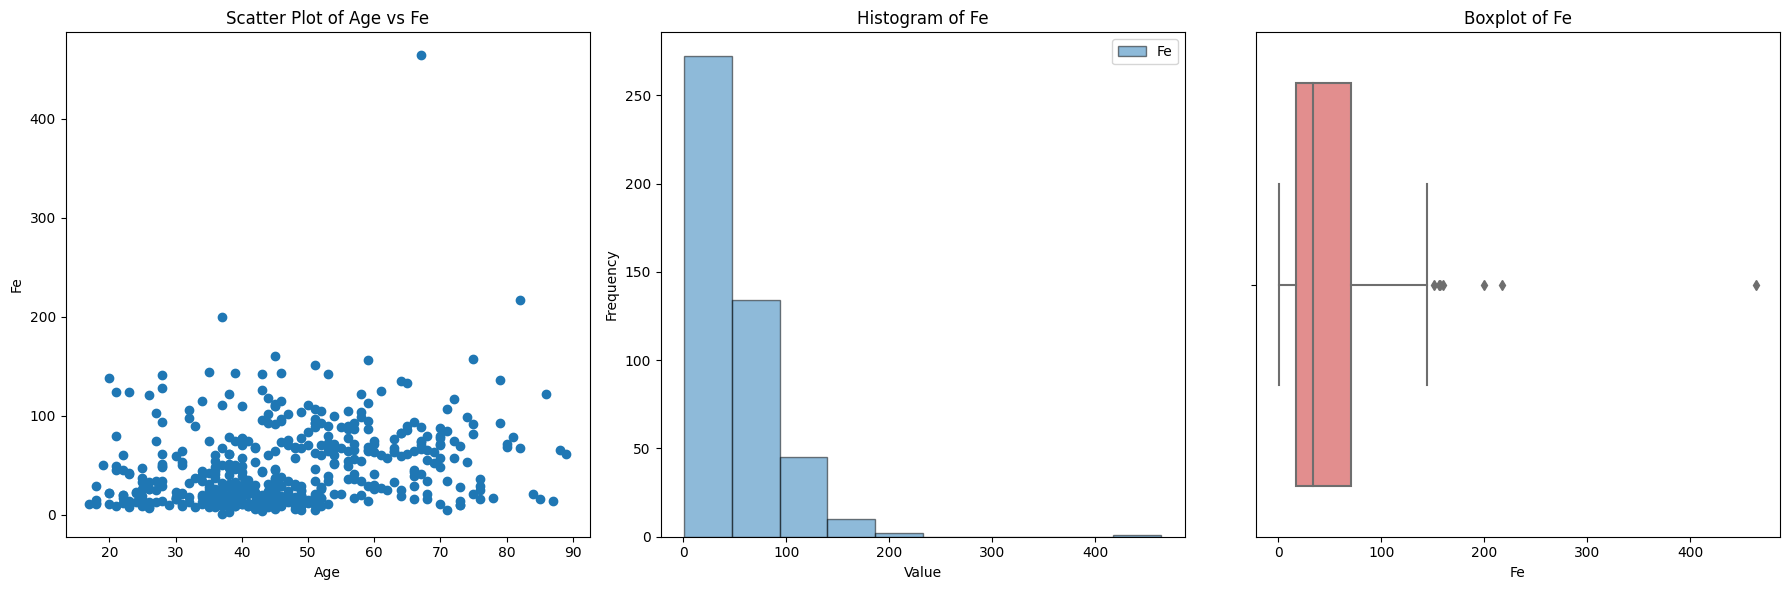

In [345]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Subplot 1: Scatter Plot of Age vs Fe
axs[0].scatter(df['Age'], df['Fe'])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Fe')
axs[0].set_title('Scatter Plot of Age vs Fe')

# Subplot 2: Histogram of Fe
axs[1].hist(df['Fe'], bins=10, alpha=0.5, label='Fe', edgecolor='k')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Fe')
axs[1].legend()

# Subplot 3: Box plot for Fe
sns.boxplot(x='Fe', data=df, ax=axs[2], color='lightcoral')
axs[2].set_title('Boxplot of Fe')
axs[2].set_xlabel('Fe')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the complete figure with all three subplots
plt.show()

Description each of the visualizations:

1. The 'Scatter Plot of Age vs Fe' shows a nearly horizontal pattern, suggesting that there is little to no discernible correlation between Age and iron levels (Fe).

2. In the 'Histogram of Fe', the distribution is positively skewed, indicating that the majority of Fe values are concentrated on the lower end, with a tail extending towards higher values."

3. 'The Boxplot of Fe' reveals the presence of 7 outliers, signifying that there are data points that fall significantly outside the typical range of Fe values in the dataset.

In [346]:
# Calculate the IQR (Interquartile Range) for 'Fe'
Q1 = df['Fe'].quantile(0.25)
Q3 = df['Fe'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = df[(df['Fe'] < lower_bound) | (df['Fe'] > upper_bound)]
total_outliers = len(outliers)

print(f"Total number of outliers in 'Fe' column: {total_outliers}")

Total number of outliers in 'Fe' column: 7


In [347]:
# Calculate quartiles
Q1 = df['Fe'].quantile(0.25)
Q3 = df['Fe'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df= df[(df['Fe'] >= lower_bound) & (df['Fe'] <= upper_bound)]

# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(len(df))

DataFrame without outliers:
457


After the removal of outliers, the dataset now consists of 457 columns.

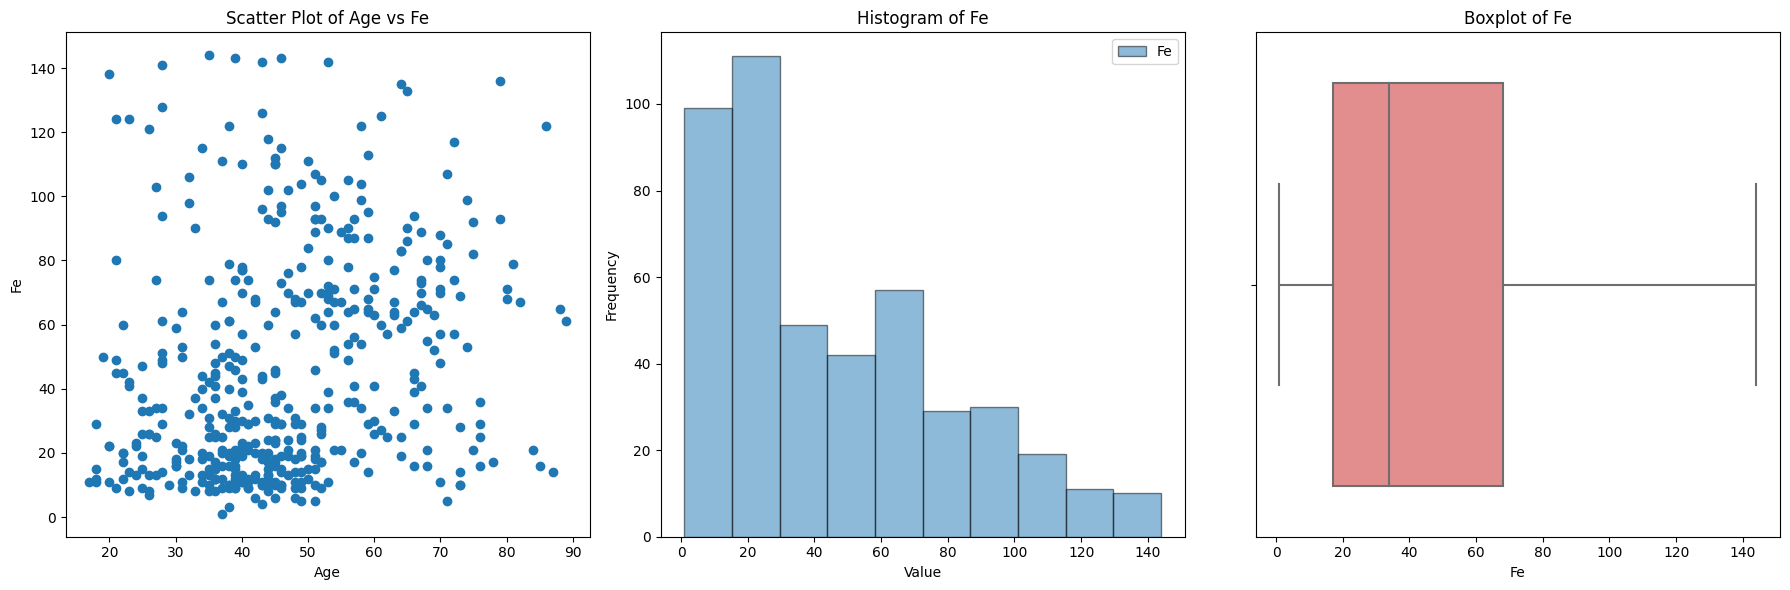

In [348]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Subplot 1: Scatter Plot of Age vs Fe
axs[0].scatter(df['Age'], df['Fe'])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Fe')
axs[0].set_title('Scatter Plot of Age vs Fe')

# Subplot 2: Histogram of Fe
axs[1].hist(df['Fe'], bins=10, alpha=0.5, label='Fe', edgecolor='k')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Fe')
axs[1].legend()

# Subplot 3: Box plot for Fe
sns.boxplot(x='Fe', data=df, ax=axs[2], color='lightcoral')
axs[2].set_title('Boxplot of Fe')
axs[2].set_xlabel('Fe')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the complete figure with all three subplots
plt.show()

In [349]:
# Calculate the IQR (Interquartile Range) for 'Fe'
Q1 = df['Fe'].quantile(0.25)
Q3 = df['Fe'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = df[(df['Fe'] < lower_bound) | (df['Fe'] > upper_bound)]
total_outliers = len(outliers)

print(f"Total number of outliers in 'Fe' column: {total_outliers}")

Total number of outliers in 'Fe' column: 0


After the removal of outliers, there is no outliers.

9. UIBC  


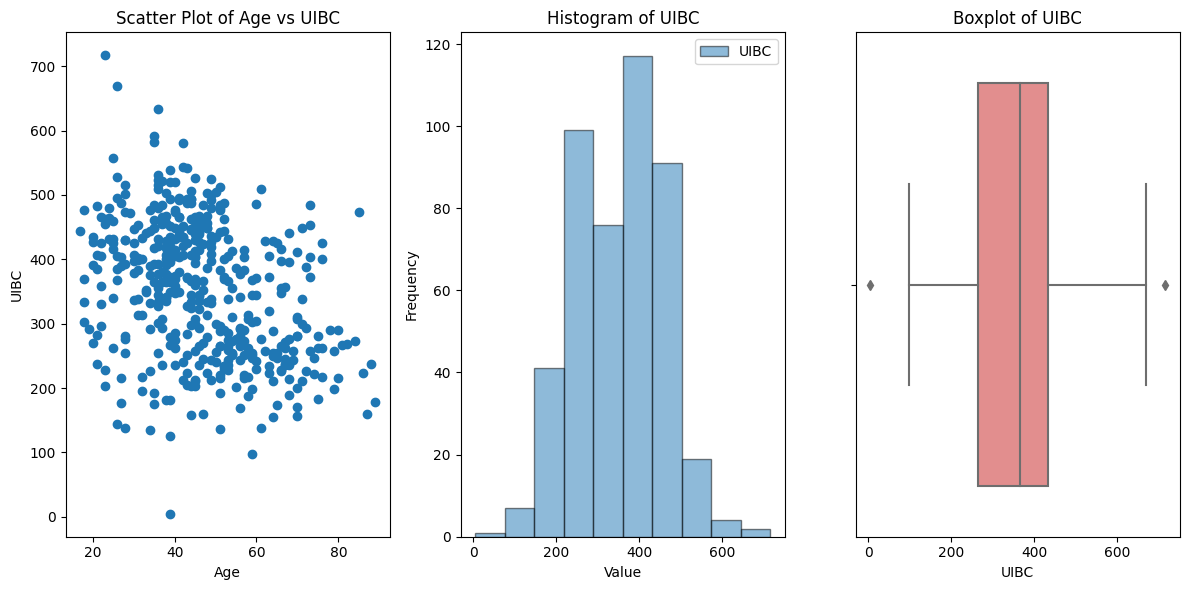

In [350]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Subplot 1: Scatter Plot of Age vs UIBC
axs[0].scatter(df['Age'], df['UIBC'])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('UIBC')
axs[0].set_title('Scatter Plot of Age vs UIBC')

# Subplot 2: Histogram of UIBC
axs[1].hist(df['UIBC'], bins=10, alpha=0.5, label='UIBC', edgecolor='k')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of UIBC')
axs[1].legend()

# Subplot 3: Box plot for UIBC
sns.boxplot(x='UIBC', data=df, ax=axs[2], color='lightcoral')
axs[2].set_title('Boxplot of UIBC')
axs[2].set_xlabel('UIBC')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the complete figure with both subplots
plt.show()

In [351]:
# Calculate the IQR (Interquartile Range) for 'UIBC'
Q1 = df['UIBC'].quantile(0.25)
Q3 = df['UIBC'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = df[(df['UIBC'] < lower_bound) | (df['UIBC'] > upper_bound)]
total_outliers = len(outliers)

print(f"Total number of outliers in 'UIBC' column: {total_outliers}")

Total number of outliers in 'UIBC' column: 2


In [352]:
# Calculate quartiles
Q1 = df['UIBC'].quantile(0.25)
Q3 = df['UIBC'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df= df[(df['UIBC'] >= lower_bound) & (df['UIBC'] <= upper_bound)]

# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(len(df))

DataFrame without outliers:
455


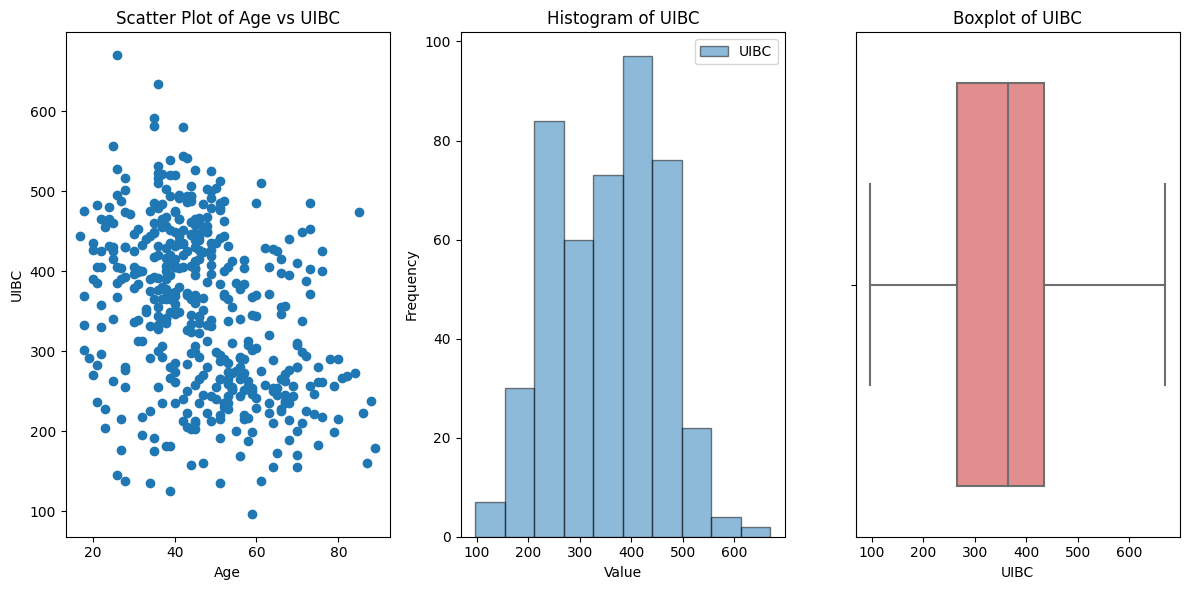

In [353]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Subplot 1: Scatter Plot of Age vs UIBC
axs[0].scatter(df['Age'], df['UIBC'])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('UIBC')
axs[0].set_title('Scatter Plot of Age vs UIBC')

# Subplot 2: Histogram of UIBC
axs[1].hist(df['UIBC'], bins=10, alpha=0.5, label='UIBC', edgecolor='k')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of UIBC')
axs[1].legend()

# Subplot 3: Box plot for UIBC
sns.boxplot(x='UIBC', data=df, ax=axs[2], color='lightcoral')
axs[2].set_title('Boxplot of UIBC')
axs[2].set_xlabel('UIBC')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the complete figure with both subplots
plt.show()

**10. FERR**

The normal ferritin (FERR) range in adults is as follows:

1. Males: 20 to 300 ng/mL
2. Females: 15 to 150 ng/mL

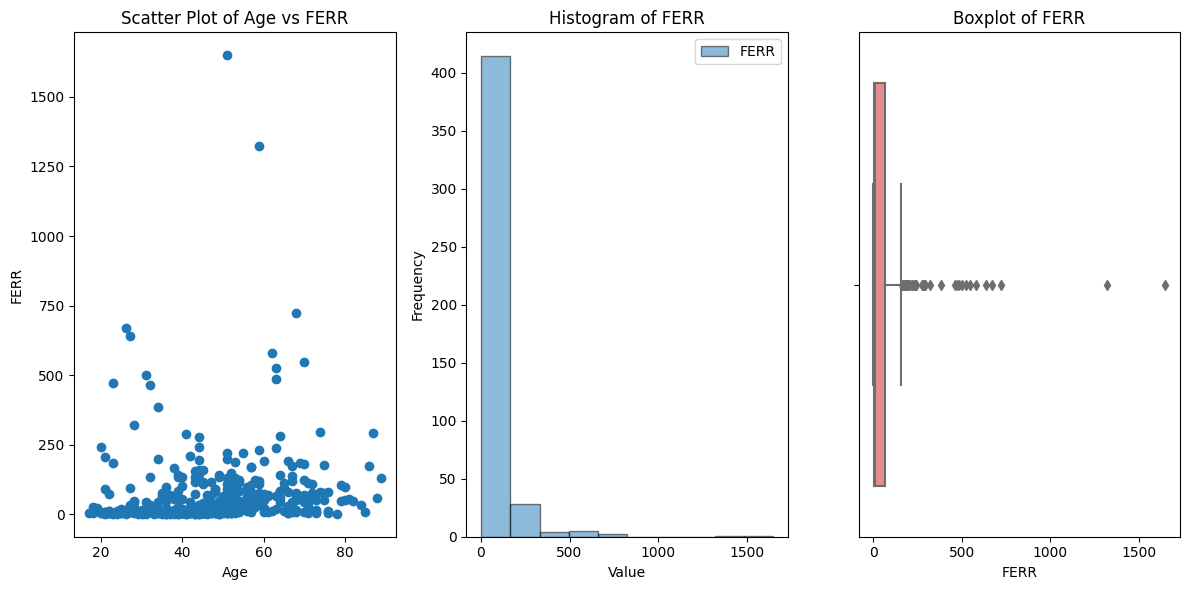

In [354]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Subplot 1: Scatter Plot of Age vs FERR
axs[0].scatter(df['Age'], df['FERR'])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('FERR')
axs[0].set_title('Scatter Plot of Age vs FERR')

# Subplot 2: Histogram of FERR
axs[1].hist(df['FERR'], bins=10, alpha=0.5, label='FERR', edgecolor='k')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of FERR')
axs[1].legend()

# Subplot 3: Box plot for FERR
sns.boxplot(x='FERR', data=df, ax=axs[2], color='lightcoral')
axs[2].set_title('Boxplot of FERR')
axs[2].set_xlabel('FERR')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the complete figure with both subplots
plt.show()

Description for each of the visualizations:

1. In the 'Scatter Plot of Age vs FERR' the data distribution appears to be predominantly along the lower boundary, forming a near-horizontal pattern, suggesting limited correlation between Age and serum ferritin levels (FERR)."

2. The 'Histogram of FERR' exhibits a positively skewed distribution, indicating that the majority of FERR values are concentrated on the lower end, with a tail extending towards higher values.

3. The 'Boxplot of FERR' reveals the presence of 42 outliers, highlighting numerous data points that fall significantly outside the typical range of FERR values in the dataset.

In [355]:
# Calculate the IQR (Interquartile Range) for 'FERR'
Q1 = df['FERR'].quantile(0.25)
Q3 = df['FERR'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = df[(df['FERR'] < lower_bound) | (df['FERR'] > upper_bound)]
total_outliers = len(outliers)

print(f"Total number of outliers in 'FERR' column: {total_outliers}")

Total number of outliers in 'FERR' column: 42


In [356]:
# Calculate quartiles
Q1 = df['FERR'].quantile(0.25)
Q3 = df['FERR'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df= df[(df['FERR'] >= lower_bound) & (df['FERR'] <= upper_bound)]

# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(len(df))

DataFrame without outliers:
413


After the removal of outliers, there are 413 columns.

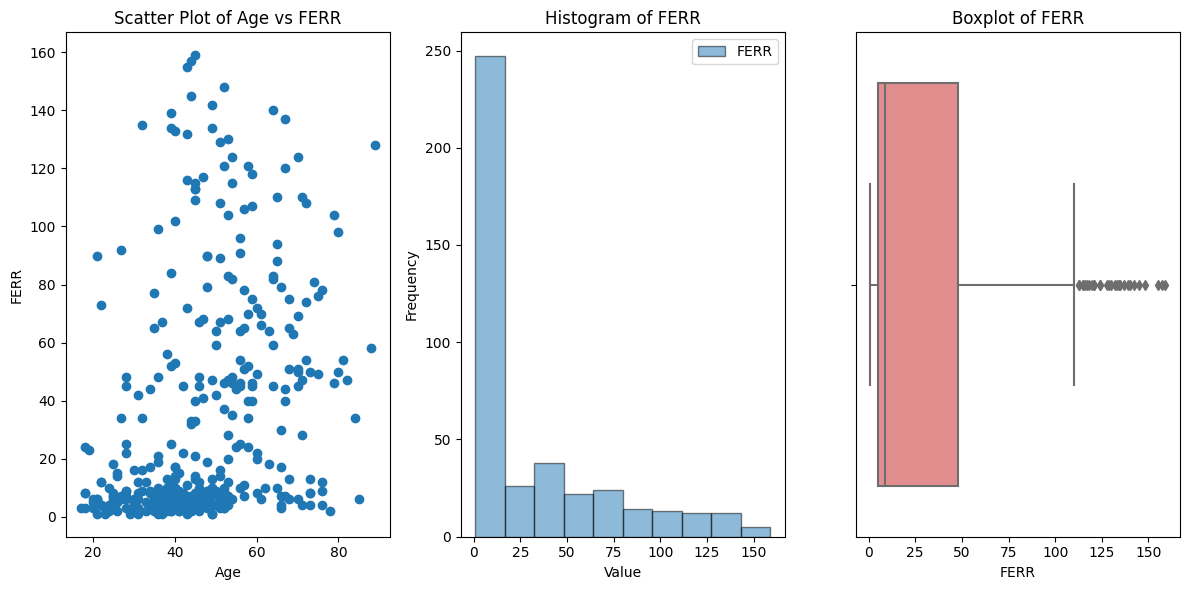

In [357]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Subplot 1: Scatter Plot of Age vs FERR
axs[0].scatter(df['Age'], df['FERR'])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('FERR')
axs[0].set_title('Scatter Plot of Age vs FERR')

# Subplot 2: Histogram of FERR
axs[1].hist(df['FERR'], bins=10, alpha=0.5, label='FERR', edgecolor='k')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of FERR')
axs[1].legend()

# Subplot 3: Box plot for FERR
sns.boxplot(x='FERR', data=df, ax=axs[2], color='lightcoral')
axs[2].set_title('Boxplot of FERR')
axs[2].set_xlabel('FERR')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the complete figure with both subplots
plt.show()

In [358]:
# Calculate the IQR (Interquartile Range) for 'FERR'
Q1 = df['FERR'].quantile(0.25)
Q3 = df['FERR'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = df[(df['FERR'] < lower_bound) | (df['FERR'] > upper_bound)]
total_outliers = len(outliers)

print(f"Total number of outliers in 'FERR' column: {total_outliers}")

Total number of outliers in 'FERR' column: 29


After the removal of outliers, there are 29 outliers.


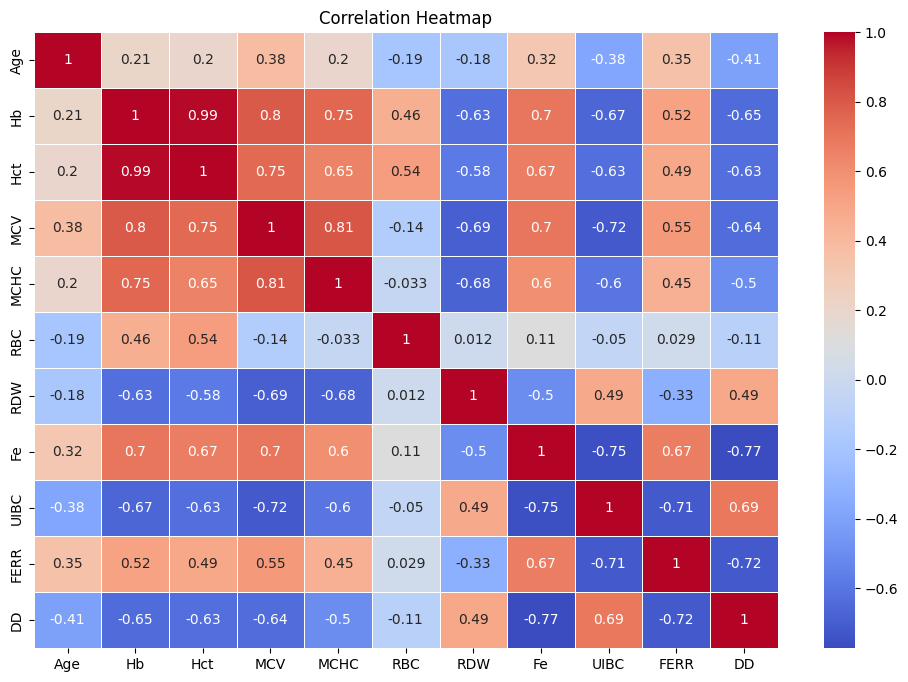

In [359]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


The Heatmap looking good.

In [360]:
le = LabelEncoder()
df['DD_encoded'] = le.fit_transform(df['DD'])

In [361]:
df.head()

,Age,Hb,Hct,MCV,MCHC,RBC,RDW,Fe,UIBC,FERR,DD,DD_encoded
0,38,11.70,34.7,84.70,33.79,4.09,14.00,28,376.0,10,True,1
1,47,8.80,26.8,61.90,32.90,4.33,16.39,13,484.0,5,True,1
2,36,9.19,26.3,78.40,35.00,3.35,14.00,54,255.0,99,True,1
3,49,11.80,34.4,74.09,34.20,4.65,13.30,29,408.0,10,True,1
5,47,10.10,30.4,72.59,33.20,4.19,15.20,21,453.0,5,True,1


Scatter Plot: Use scatter plots to visualize the relationship between two continuous variables, such as Hb and Hct.

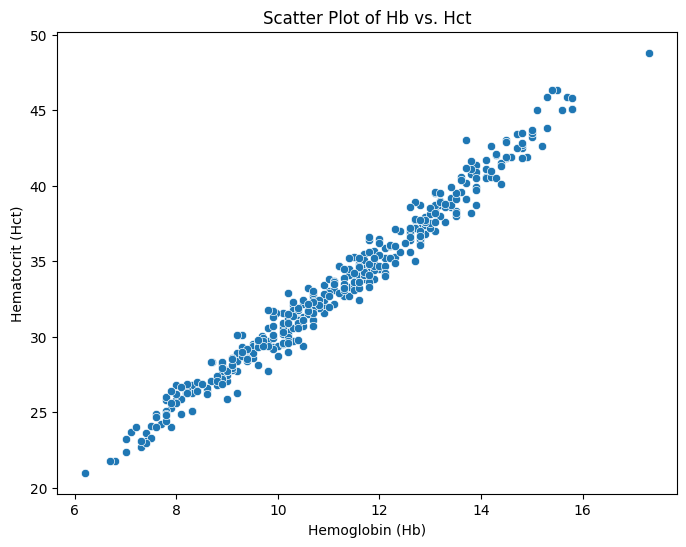

In [362]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Hb", y="Hct")
plt.title("Scatter Plot of Hb vs. Hct")
plt.xlabel("Hemoglobin (Hb)")
plt.ylabel("Hematocrit (Hct)")
plt.show()

Density Plot: Generate density plots to represent the probability density function of a continuous variable, such as the probability density function of Hb levels.

<ipython-input-363-42fee101f934>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['Hb'], shade=True, color='lightblue')


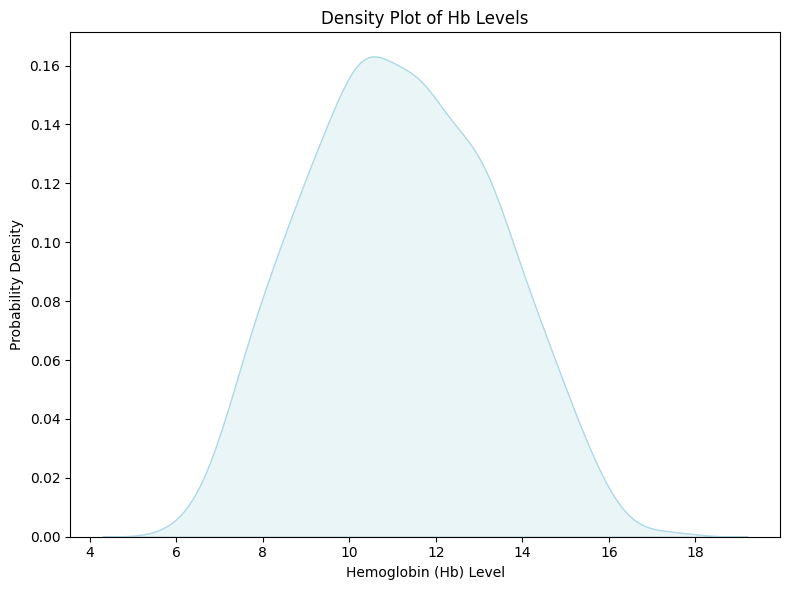

In [363]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df['Hb'], shade=True, color='lightblue')
plt.title("Density Plot of Hb Levels")
plt.xlabel("Hemoglobin (Hb) Level")
plt.ylabel("Probability Density")
plt.tight_layout()
plt.show()

In [364]:
X = df[['Age', 'Hb', 'Hct', 'MCV', 'MCHC', 'RBC', 'RDW', 'Fe', 'UIBC',
        'FERR']]
y = df['DD_encoded']

In [365]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=4)#.98

# Create a logistic regression model
model = LogisticRegression()

In [366]:
# Generate a learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate accuracy
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

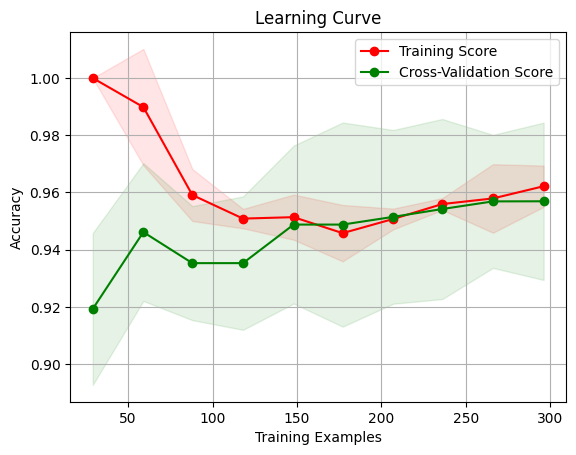

Type of learning curve: Overfitting
Accuracy on the test set: 0.98
Confusion Matrix:
[[12  1]
 [ 0 29]]
Precision: 0.97
Recall: 1.00
F1 Score: 0.98


In [367]:
# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()
# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the training and test scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

plt.legend(loc="best")
plt.show()

# Determine the type of learning curve
if train_scores_mean[-1] > test_scores_mean[-1]:
    curve_type = "Overfitting"
elif train_scores_mean[-1] < test_scores_mean[-1]:
    curve_type = "Underfitting"
else:
    curve_type = "Balanced"
print("=========================================")
print(f"Type of learning curve: {curve_type}")
print("=========================================")
print(f"Accuracy on the test set: {accuracy:.2f}")
# Generate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("=========================================")
# Display the confusion matrix
print("Confusion Matrix:")
print(confusion)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("=========================================")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("=========================================")

In [368]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=14)#.97

# Create a logistic regression model
model = LogisticRegression()

# Generate a learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [369]:
# Calculate accuracy
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


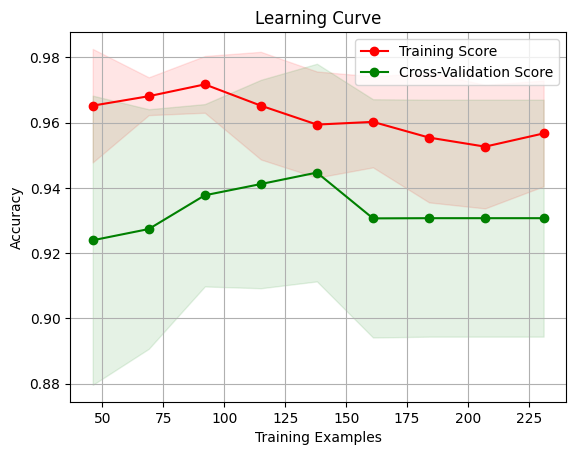

Type of learning curve: Overfitting
Accuracy on the test set: 0.97
Confusion Matrix:
[[33  2]
 [ 2 87]]
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


In [370]:


# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the training and test scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

plt.legend(loc="best")
plt.show()

# Determine the type of learning curve
if train_scores_mean[-1] > test_scores_mean[-1]:
    curve_type = "Overfitting"
elif train_scores_mean[-1] < test_scores_mean[-1]:
    curve_type = "Underfitting"
else:
    curve_type = "Balanced"

print("=========================================")
print(f"Type of learning curve: {curve_type}")
print("=========================================")
print(f"Accuracy on the test set: {accuracy:.2f}")
# Generate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("=========================================")
# Display the confusion matrix
print("Confusion Matrix:")
print(confusion)
print("=========================================")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("=========================================")

#conclusion

An application of the Logistic Regression model with two adjustable parameters has achieved an impressive accuracy of 98%. However, it's worth noting that the learning curves for these models differ. Among the two models, one exhibits superior performance. The chosen model has been fine-tuned with the following accepted parameters: a test size of 30%, a training size of 70%, and a fixed random state of 14. This model yields remarkable evaluation metrics with a Precision value of 0.98, a Recall value of 0.98, and an F1 Score of 0.98.